## <span style="color:darkblue"> Lematización o Stemming </span>
* Una buena técnica para obtener la información relevante de un texto consiste en eliminar los elementos que puedan ser irrelevantes, y resaltar más lo que los textos tienen en común que sus diferencias.  

## 1) Tokenización
* Vamos a eliminar las palabras que tienen poco interés. 
* El primer paso es delimitar las palabras del texto, y convertir esas palabras en elementos de una lista (tokenizar). 
* 1) Descargar la librería spacy: !pip install -U spacy 
* 2) Descargar el modelo del español, en la terminal colocar: python -m spacy download es

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from wordcloud import WordCloud
import collections
import spacy

import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords

In [2]:
# Abro una nueva ventana que me parmite hacer la instalación de todos los paquetes que necesite de la librería nltk
#nltk.download()

In [3]:
# Tokenizar
nlp = spacy.load('es_core_news_sm')
text = 'Soy un texto. Normalmente soy más largo y más grande. Que no te engañe mi tamaño.'
doc = nlp(text) # Crea un objeto de spacy tipo nlp
tokens = [t.orth_ for t in doc] # Crea una lista con las palabras del texto

## 2) Limpieza del texto
* Vamos a eliminar de esa lista las palabras muy comunes o poco informativas, desde el punto de vista léxico, tales como conjunciones (y, o, ni, que), preposiciones (a, en, para, por, entre otras) y verbos muy comunes (ser, ir, y otros más).
* Palabras poco representativas (stopwords).
* Obtendremos una lista de palabras que realmente podrían ser pistas sobre el tópico del texto, o que nos permitan clasificarlo más fácilmente.

In [4]:
# Limpieza
lexical_tokens = [t.orth_ for t in doc if not t.is_punct | t.is_stop]

## 3) Normalizar el texto
* Nuestro tokenizador reconoce formas como caminar, Caminar y CAMINAR como formas distintas, la normalización nos permite unificar estos datos en uno solo.
* Aprovecharemos este paso para descartar palabras muy cortas (menores a 4 caracteres) para filtrar aún más nuestros tokens.

In [5]:
# Normalizar y Remover los signos de puntuación
words = [t.lower() for t in lexical_tokens if len(t) > 3 and t.isalpha()]

## Ahora podemos poner todo junto en una función

In [6]:
nlp = spacy.load('es_core_news_sm')

# tokenize, clean and normalize
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop] 
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
    return lexical_tokens

In [8]:
tokens_spanish = normalize(text)

In [9]:
tokens_spanish_str=str(tokens_spanish)

In [10]:
# Set the stopwords
stopwords = set(line.strip() for line in open('todos_los_textos.csv', 'r',encoding="utf8"))
#stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

# Initializing a dictionary, for each word in the file adds a word  and if it exists increments the counter
wordcount = {}

# Remove duplicates, separate by punctuation, and use delimiters
for word in tokens_spanish_str.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1


Las 10 palabras más usadas son:

['texto' :  1
'normalmente' :  1
'grande' :  1
'engañe' :  1
'tamaño'] :  1


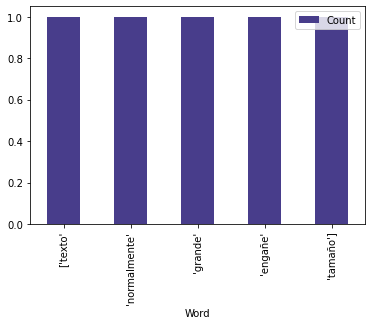

In [11]:
# Print the most used words
n_print = int(10)
print("\nLas {} palabras más usadas son:\n".format(n_print))

word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

# Create a dataframe with the most used words
list_spanish = word_counter.most_common(n_print)
frequency = pd.DataFrame(list_spanish, columns = ['Word', 'Count'])

# Gráfico de barras
frequency.plot.bar(x='Word',y='Count', color='darkslateblue')
plt.savefig('palabras_mas_usadas.jpg')